In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from functools import partial
import cv2 as cv


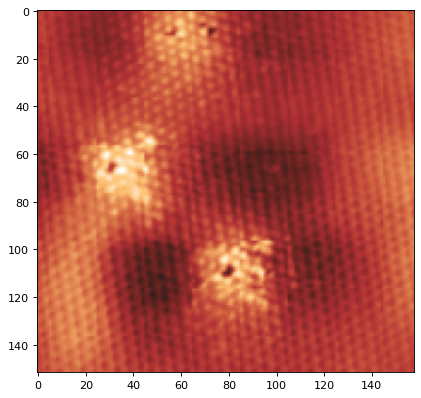

In [476]:

plt.figure(num=None, figsize=(8, 6), dpi=80)
img = plt.imread('image2.png')
plt.imshow(img)
plt.show()

# first let us develop an autoencoder

In [477]:
img.shape

(152, 158, 4)

In [478]:
# convert to grayscale
img_gr = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [479]:
img.shape

(152, 158, 4)

In [480]:
img_reshape = img_gr[0:150, 0:150]
img_reshape.shape


(150, 150)

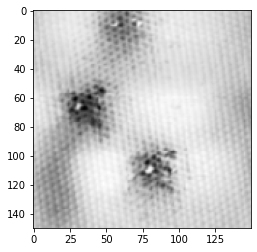

In [481]:
plt.imshow(img_reshape, cmap='binary')

In [482]:
# Adjust contrast of the image
size_image = 4
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
orig_scaled = np.zeros((img_reshape.shape[0], img_reshape.shape[1]))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]
        avg_bright = np.sum(broken_up[count]) / (size_image*size_image)
        broken_up[count] = broken_up[count] * 0.5/avg_bright
        orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  broken_up[count,:,:]
        count += 1

In [483]:
size_image = 6
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]

        count += 1

In [484]:
stacked_encoder = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[size_image,size_image]), # take input and flatten until a single vector
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(15, activation="selu"),
    #keras.layers.Dense(2, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(50,activation="selu", input_shape=[15]), # dense layer to decode
   #keras.layers.Dense(50, activation="relu"),
    #keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    keras.layers.Dense(size_image*size_image, activation="sigmoid"),
    keras.layers.Reshape([size_image,size_image])
])


stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(broken_up, broken_up, epochs=250)

Epoch 1/250
20/20 [==============================] - 0s 679us/step - loss: 0.0112
Epoch 2/250
20/20 [==============================] - 0s 645us/step - loss: 0.0087
Epoch 3/250
20/20 [==============================] - 0s 541us/step - loss: 0.0078
Epoch 4/250
20/20 [==============================] - 0s 481us/step - loss: 0.0071
Epoch 5/250
20/20 [==============================] - 0s 497us/step - loss: 0.0064
Epoch 6/250
20/20 [==============================] - 0s 483us/step - loss: 0.0058
Epoch 7/250
20/20 [==============================] - 0s 548us/step - loss: 0.0053
Epoch 8/250
20/20 [==============================] - 0s 470us/step - loss: 0.0049
Epoch 9/250
20/20 [==============================] - 0s 513us/step - loss: 0.0045
Epoch 10/250
20/20 [==============================] - 0s 501us/step - loss: 0.0042
Epoch 11/250
20/20 [==============================] - 0s 521us/step - loss: 0.0039
Epoch 12/250
20/20 [==============================] - 0s 501us/step - loss: 0.0038
Epoch 13/250


20/20 [==============================] - 0s 543us/step - loss: 0.0016
Epoch 100/250
20/20 [==============================] - 0s 518us/step - loss: 0.0013
Epoch 101/250
20/20 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 102/250
20/20 [==============================] - 0s 468us/step - loss: 0.0013
Epoch 103/250
20/20 [==============================] - 0s 487us/step - loss: 0.0013
Epoch 104/250
20/20 [==============================] - 0s 508us/step - loss: 0.0013
Epoch 105/250
20/20 [==============================] - 0s 509us/step - loss: 0.0014
Epoch 106/250
20/20 [==============================] - 0s 469us/step - loss: 0.0013
Epoch 107/250
20/20 [==============================] - 0s 490us/step - loss: 0.0013
Epoch 108/250
20/20 [==============================] - 0s 488us/step - loss: 0.0013
Epoch 109/250
20/20 [==============================] - 0s 490us/step - loss: 0.0013
Epoch 110/250
20/20 [==============================] - 0s 480us/step - loss: 0.0014
Epoch 

20/20 [==============================] - 0s 512us/step - loss: 9.4075e-04
Epoch 196/250
20/20 [==============================] - 0s 490us/step - loss: 9.2991e-04
Epoch 197/250
20/20 [==============================] - 0s 498us/step - loss: 0.0010
Epoch 198/250
20/20 [==============================] - 0s 477us/step - loss: 9.9699e-04
Epoch 199/250
20/20 [==============================] - 0s 448us/step - loss: 0.0010
Epoch 200/250
20/20 [==============================] - 0s 507us/step - loss: 9.4004e-04
Epoch 201/250
20/20 [==============================] - 0s 532us/step - loss: 9.0940e-04
Epoch 202/250
20/20 [==============================] - 0s 509us/step - loss: 9.1798e-04
Epoch 203/250
20/20 [==============================] - 0s 501us/step - loss: 9.0697e-04
Epoch 204/250
20/20 [==============================] - 0s 509us/step - loss: 9.3080e-04
Epoch 205/250
20/20 [==============================] - 0s 513us/step - loss: 9.8029e-04
Epoch 206/250
20/20 [==============================] -

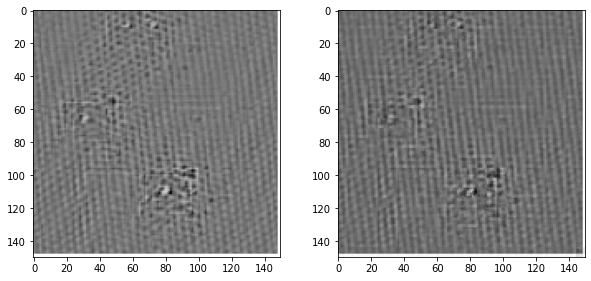

In [487]:
reconstructed = np.zeros((150,150))

count = 0
predictions = stacked_ae.predict(broken_up)
for i in range(number_steps):
    for j in range(number_steps):
        reconstructed[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  predictions[count,:,:]
        count +=1
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(reconstructed, cmap="binary")

plt.show()

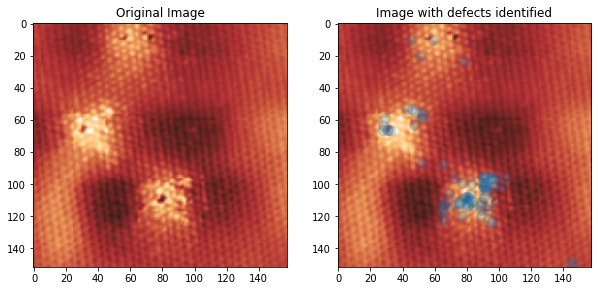

In [491]:
defect = (reconstructed - orig_scaled) 
thresh = 0.13
plotdefect = []


for i in range(150):
    for j in range(150):
        if abs(defect[i,j]) > thresh:
            
            plotdefect.append([i,j])

            
            
plotdefect = np.asarray(plotdefect)



fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.title('Image with defects identified')

plt.imshow(img)
plt.scatter(plotdefect[:,1], plotdefect[:,0], s=100, alpha=0.2)
plt.savefig('./result_image2b.png')
plt.show()


In [358]:
deconstructed = stacked_encoder.predict(broken_up)

In [359]:
deconstructed.shape

(625, 15)

In [364]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state = 10).fit(deconstructed)

In [366]:
kmeans.labels_[0]

1

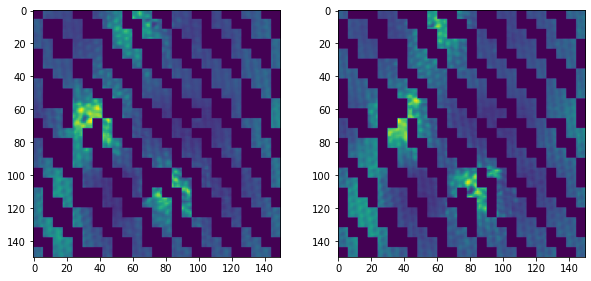

In [369]:
defect_image = np.zeros(( 150, 150))
normal_image = np.zeros(( 150, 150))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        if kmeans.labels_[count] == 1:
            defect_image[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]
        else:
            normal_image[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]

        count += 1

        
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(normal_image)
plt.subplot(2, 2, 2)
plt.imshow(defect_image)


plt.show()



In [389]:
stacked_encoder = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[size_image,size_image]), # take input and flatten until a single vector
    keras.layers.Dense(25, activation="selu"),
    keras.layers.Dense(5, activation="selu"),
    #keras.layers.Dense(2, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(25,activation="selu", input_shape=[5]), # dense layer to decode
   #keras.layers.Dense(50, activation="relu"),
    #keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    keras.layers.Dense(size_image*size_image, activation="sigmoid"),
    keras.layers.Reshape([size_image,size_image])
])


stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(broken_up, broken_up, epochs=250)

Epoch 1/250
20/20 [==============================] - 0s 575us/step - loss: 0.0075
Epoch 2/250
20/20 [==============================] - 0s 563us/step - loss: 0.0030
Epoch 3/250
20/20 [==============================] - 0s 531us/step - loss: 0.0030
Epoch 4/250
20/20 [==============================] - 0s 530us/step - loss: 0.0029
Epoch 5/250
20/20 [==============================] - 0s 519us/step - loss: 0.0029
Epoch 6/250
20/20 [==============================] - 0s 479us/step - loss: 0.0029
Epoch 7/250
20/20 [==============================] - 0s 463us/step - loss: 0.0029
Epoch 8/250
20/20 [==============================] - 0s 433us/step - loss: 0.0028
Epoch 9/250
20/20 [==============================] - 0s 524us/step - loss: 0.0028
Epoch 10/250
20/20 [==============================] - 0s 503us/step - loss: 0.0028
Epoch 11/250
20/20 [==============================] - 0s 540us/step - loss: 0.0028
Epoch 12/250
20/20 [==============================] - 0s 485us/step - loss: 0.0028
Epoch 13/250


20/20 [==============================] - 0s 491us/step - loss: 0.0018
Epoch 100/250
20/20 [==============================] - 0s 526us/step - loss: 0.0018
Epoch 101/250
20/20 [==============================] - 0s 482us/step - loss: 0.0017
Epoch 102/250
20/20 [==============================] - 0s 494us/step - loss: 0.0017
Epoch 103/250
20/20 [==============================] - 0s 503us/step - loss: 0.0017
Epoch 104/250
20/20 [==============================] - 0s 499us/step - loss: 0.0017
Epoch 105/250
20/20 [==============================] - 0s 520us/step - loss: 0.0017
Epoch 106/250
20/20 [==============================] - 0s 520us/step - loss: 0.0017
Epoch 107/250
20/20 [==============================] - 0s 504us/step - loss: 0.0017
Epoch 108/250
20/20 [==============================] - 0s 487us/step - loss: 0.0017
Epoch 109/250
20/20 [==============================] - 0s 486us/step - loss: 0.0017
Epoch 110/250
20/20 [==============================] - 0s 522us/step - loss: 0.0017
Epoch 

20/20 [==============================] - 0s 503us/step - loss: 0.0013
Epoch 197/250
20/20 [==============================] - 0s 449us/step - loss: 0.0013
Epoch 198/250
20/20 [==============================] - 0s 493us/step - loss: 0.0013
Epoch 199/250
20/20 [==============================] - 0s 465us/step - loss: 0.0013
Epoch 200/250
20/20 [==============================] - 0s 487us/step - loss: 0.0013
Epoch 201/250
20/20 [==============================] - 0s 517us/step - loss: 0.0013
Epoch 202/250
20/20 [==============================] - 0s 506us/step - loss: 0.0013
Epoch 203/250
20/20 [==============================] - 0s 453us/step - loss: 0.0013
Epoch 204/250
20/20 [==============================] - 0s 501us/step - loss: 0.0013
Epoch 205/250
20/20 [==============================] - 0s 449us/step - loss: 0.0013
Epoch 206/250
20/20 [==============================] - 0s 485us/step - loss: 0.0013
Epoch 207/250
20/20 [==============================] - 0s 467us/step - loss: 0.0013
Epoch 

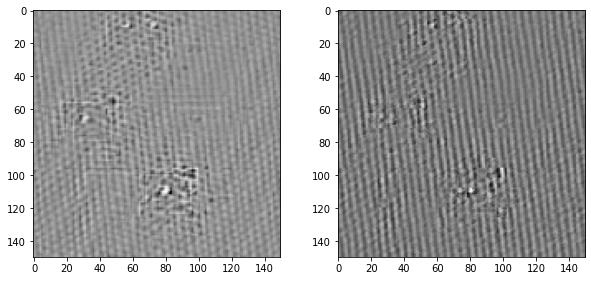

In [390]:
reconstructed = np.zeros((150,150))

count = 0
predictions = stacked_ae.predict(broken_up)
for i in range(number_steps):
    for j in range(number_steps):
        reconstructed[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  predictions[count,:,:]
        count +=1
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(reconstructed, cmap="binary")

plt.show()

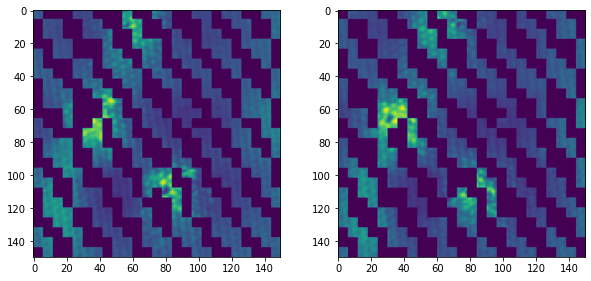

In [396]:
kmeans = KMeans(n_clusters=2).fit(deconstructed)
defect_image = np.zeros(( 150, 150))
normal_image = np.zeros(( 150, 150))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        if kmeans.labels_[count] == 0:
            defect_image[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]
        else:
            normal_image[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]

        count += 1

        
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(normal_image)
plt.subplot(2, 2, 2)
plt.imshow(defect_image)


plt.show()



In [398]:
orig_scaled.min()

0.1736139941281748

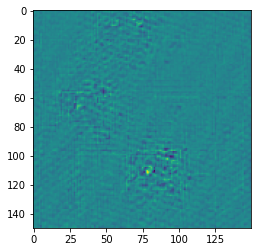

In [410]:
noerr = np.zeros((150,150))
defect = (reconstructed - orig_scaled) 
plt.imshow(defect)


In [412]:
defect[110,78]

0.3199344685339901

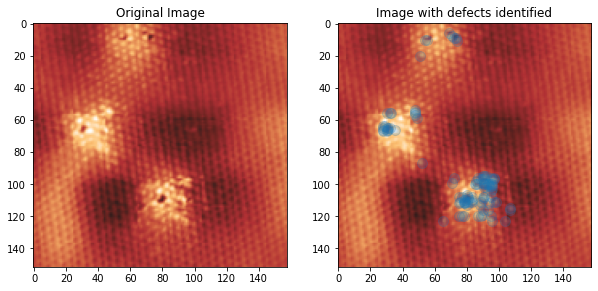

In [442]:
thresh = 0.15
plotdefect = []


for i in range(150):
    for j in range(150):
        if abs(defect[i,j]) > thresh:
            
            plotdefect.append([i,j])

            
            
plotdefect = np.asarray(plotdefect)



fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.title('Image with defects identified')

plt.imshow(img)
plt.scatter(plotdefect[:,1], plotdefect[:,0], s=100, alpha=0.2)
plt.savefig('./result_image2.png')
plt.show()



# Repeat for another image

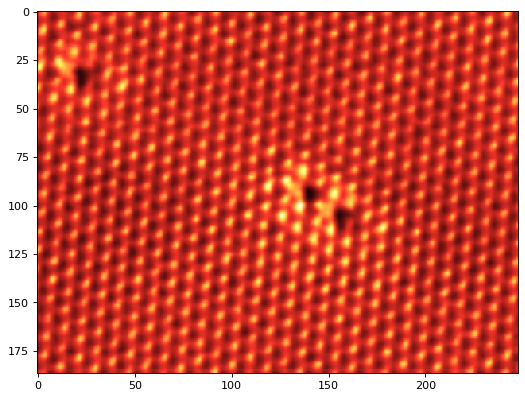

In [729]:

plt.figure(num=None, figsize=(8, 6), dpi=80)
img = plt.imread('firstSTM.png')
plt.imshow(img)
plt.show()

In [730]:
img.shape

(187, 248, 4)

In [731]:
print(187/4)
print(187/6)

46.75
31.166666666666668


In [732]:
print(45*4)
print(30*6)

180
180


In [733]:
# convert to grayscale
img_gr = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

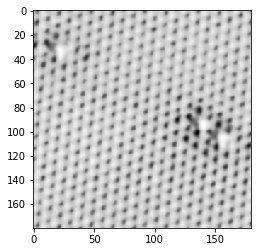

In [734]:
img_reshape = img_gr[0:180, 0:180]
plt.imshow(img_reshape, cmap='binary')

In [735]:
# Adjust contrast of the image
size_image = 4
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
orig_scaled = np.zeros((img_reshape.shape[0], img_reshape.shape[1]))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]
        avg_bright = np.sum(broken_up[count]) / (size_image*size_image)
        broken_up[count] = broken_up[count] * 0.5/avg_bright
        orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  broken_up[count,:,:]
        count += 1

In [736]:
orig_scaled = img_reshape
size_image = 10
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]

        count += 1

In [737]:
stacked_encoder = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[size_image,size_image]), # take input and flatten until a single vector
    keras.layers.Dense(25, activation="selu"),
    keras.layers.Dense(5, activation="selu"),
    #keras.layers.Dense(2, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(25,activation="selu", input_shape=[5]), # dense layer to decode
   #keras.layers.Dense(50, activation="relu"),
    #keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    keras.layers.Dense(size_image*size_image, activation="sigmoid"),
    keras.layers.Reshape([size_image,size_image])
])


stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(broken_up, broken_up, epochs=250)

Epoch 1/250
11/11 [==============================] - 0s 774us/step - loss: 0.0706
Epoch 2/250
11/11 [==============================] - 0s 651us/step - loss: 0.0610
Epoch 3/250
11/11 [==============================] - 0s 608us/step - loss: 0.0468
Epoch 4/250
11/11 [==============================] - 0s 482us/step - loss: 0.0328
Epoch 5/250
11/11 [==============================] - 0s 491us/step - loss: 0.0234
Epoch 6/250
11/11 [==============================] - 0s 472us/step - loss: 0.0190
Epoch 7/250
11/11 [==============================] - 0s 468us/step - loss: 0.0170
Epoch 8/250
11/11 [==============================] - 0s 498us/step - loss: 0.0162
Epoch 9/250
11/11 [==============================] - 0s 448us/step - loss: 0.0158
Epoch 10/250
11/11 [==============================] - 0s 570us/step - loss: 0.0156
Epoch 11/250
11/11 [==============================] - 0s 463us/step - loss: 0.0155
Epoch 12/250
11/11 [==============================] - 0s 490us/step - loss: 0.0154
Epoch 13/250


11/11 [==============================] - 0s 473us/step - loss: 0.0103
Epoch 100/250
11/11 [==============================] - 0s 507us/step - loss: 0.0103
Epoch 101/250
11/11 [==============================] - 0s 527us/step - loss: 0.0103
Epoch 102/250
11/11 [==============================] - 0s 453us/step - loss: 0.0102
Epoch 103/250
11/11 [==============================] - 0s 495us/step - loss: 0.0102
Epoch 104/250
11/11 [==============================] - 0s 518us/step - loss: 0.0101
Epoch 105/250
11/11 [==============================] - 0s 478us/step - loss: 0.0101
Epoch 106/250
11/11 [==============================] - 0s 488us/step - loss: 0.0100
Epoch 107/250
11/11 [==============================] - 0s 496us/step - loss: 0.0100
Epoch 108/250
11/11 [==============================] - 0s 493us/step - loss: 0.0100
Epoch 109/250
11/11 [==============================] - ETA: 0s - loss: 0.007 - 0s 548us/step - loss: 0.0099
Epoch 110/250
11/11 [==============================] - 0s 452us/st

11/11 [==============================] - 0s 496us/step - loss: 0.0069
Epoch 197/250
11/11 [==============================] - 0s 505us/step - loss: 0.0069
Epoch 198/250
11/11 [==============================] - 0s 513us/step - loss: 0.0069
Epoch 199/250
11/11 [==============================] - 0s 501us/step - loss: 0.0068
Epoch 200/250
11/11 [==============================] - 0s 568us/step - loss: 0.0068
Epoch 201/250
11/11 [==============================] - 0s 504us/step - loss: 0.0068
Epoch 202/250
11/11 [==============================] - 0s 523us/step - loss: 0.0068
Epoch 203/250
11/11 [==============================] - 0s 487us/step - loss: 0.0068
Epoch 204/250
11/11 [==============================] - 0s 484us/step - loss: 0.0068
Epoch 205/250
11/11 [==============================] - 0s 539us/step - loss: 0.0067
Epoch 206/250
11/11 [==============================] - 0s 526us/step - loss: 0.0067
Epoch 207/250
11/11 [==============================] - 0s 583us/step - loss: 0.0067
Epoch 

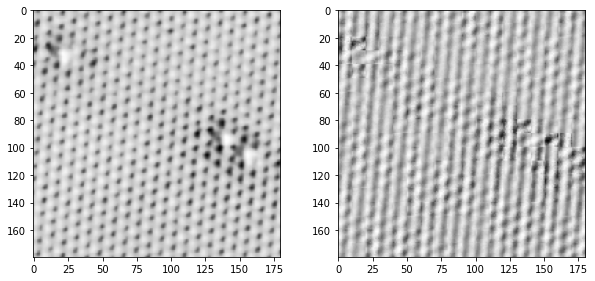

In [738]:
reconstructed = np.zeros((180,180))

count = 0
predictions = stacked_ae.predict(broken_up)
for i in range(number_steps):
    for j in range(number_steps):
        reconstructed[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  predictions[count,:,:]
        count +=1
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(reconstructed, cmap="binary")

plt.show()

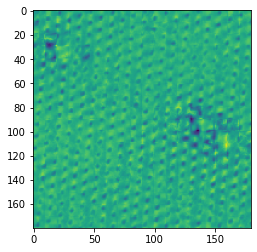

In [739]:
defect = (reconstructed - orig_scaled) 
plt.imshow(defect)

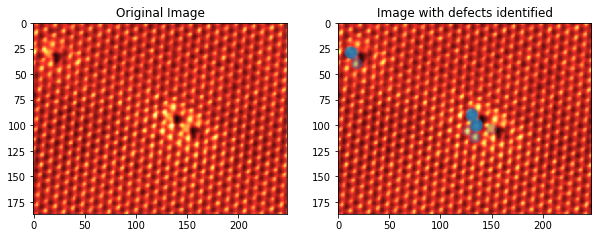

In [747]:
thresh = 0.42
plotdefect = []


for i in range(150):
    for j in range(150):
        if abs(defect[i,j]) > thresh:
            
            plotdefect.append([i,j])

            
            
plotdefect = np.asarray(plotdefect)



fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.title('Image with defects identified')

plt.imshow(img)
plt.scatter(plotdefect[:,1], plotdefect[:,0], s=100, alpha=0.2)
plt.savefig('./result_image1.png')
plt.show()



# Last image

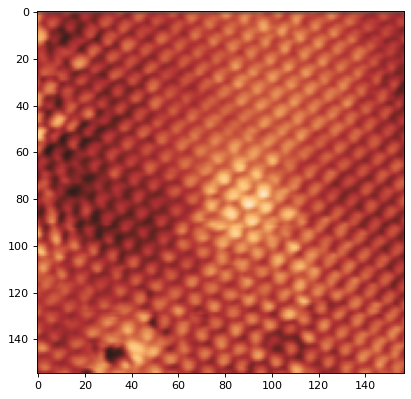

In [804]:

plt.figure(num=None, figsize=(8, 6), dpi=80)
img = plt.imread('image3.png')
plt.imshow(img)
plt.show()

In [805]:
img.shape

(155, 157, 4)

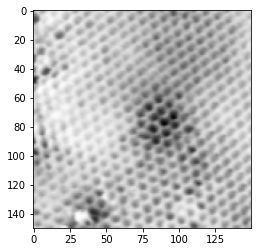

In [806]:
img_gr = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_reshape = img_gr[5:155, 0:150]
plt.imshow(img_reshape, cmap='binary')

In [854]:
# Adjust contrast of the image
size_image = 4
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
orig_scaled = np.zeros((img_reshape.shape[0], img_reshape.shape[1]))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]
        avg_bright = np.sum(broken_up[count]) / (size_image*size_image)
        broken_up[count] = broken_up[count] * 0.5/avg_bright
        orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  broken_up[count,:,:]
        count += 1

In [866]:
size_image = 10
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]

        count += 1

In [867]:
stacked_encoder = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[size_image,size_image]), # take input and flatten until a single vector
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(10, activation="selu"),
    #keras.layers.Dense(2, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(50,activation="selu", input_shape=[10]), # dense layer to decode
   #keras.layers.Dense(50, activation="relu"),
    #keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    keras.layers.Dense(size_image*size_image, activation="sigmoid"),
    keras.layers.Reshape([size_image,size_image])
])


stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(broken_up, broken_up, epochs=250)

Epoch 1/250
8/8 [==============================] - 0s 713us/step - loss: 0.0184
Epoch 2/250
8/8 [==============================] - 0s 723us/step - loss: 0.0137
Epoch 3/250
8/8 [==============================] - 0s 575us/step - loss: 0.0134
Epoch 4/250
8/8 [==============================] - 0s 663us/step - loss: 0.0130
Epoch 5/250
8/8 [==============================] - 0s 726us/step - loss: 0.0130
Epoch 6/250
8/8 [==============================] - 0s 532us/step - loss: 0.0126
Epoch 7/250
8/8 [==============================] - 0s 775us/step - loss: 0.0125
Epoch 8/250
8/8 [==============================] - 0s 517us/step - loss: 0.0123
Epoch 9/250
8/8 [==============================] - 0s 548us/step - loss: 0.0121
Epoch 10/250
8/8 [==============================] - 0s 512us/step - loss: 0.0119
Epoch 11/250
8/8 [==============================] - 0s 494us/step - loss: 0.0117
Epoch 12/250
8/8 [==============================] - 0s 507us/step - loss: 0.0115
Epoch 13/250
8/8 [===================

8/8 [==============================] - 0s 530us/step - loss: 0.0056
Epoch 103/250
8/8 [==============================] - 0s 573us/step - loss: 0.0056
Epoch 104/250
8/8 [==============================] - 0s 541us/step - loss: 0.0058
Epoch 105/250
8/8 [==============================] - 0s 556us/step - loss: 0.0056
Epoch 106/250
8/8 [==============================] - 0s 546us/step - loss: 0.0056
Epoch 107/250
8/8 [==============================] - 0s 506us/step - loss: 0.0055
Epoch 108/250
8/8 [==============================] - 0s 514us/step - loss: 0.0055
Epoch 109/250
8/8 [==============================] - 0s 479us/step - loss: 0.0054
Epoch 110/250
8/8 [==============================] - 0s 588us/step - loss: 0.0056
Epoch 111/250
8/8 [==============================] - 0s 537us/step - loss: 0.0055
Epoch 112/250
8/8 [==============================] - 0s 498us/step - loss: 0.0057
Epoch 113/250
8/8 [==============================] - 0s 493us/step - loss: 0.0053
Epoch 114/250
8/8 [===========

8/8 [==============================] - 0s 559us/step - loss: 0.0041
Epoch 202/250
8/8 [==============================] - 0s 544us/step - loss: 0.0039
Epoch 203/250
8/8 [==============================] - 0s 491us/step - loss: 0.0038
Epoch 204/250
8/8 [==============================] - 0s 533us/step - loss: 0.0038
Epoch 205/250
8/8 [==============================] - 0s 504us/step - loss: 0.0038
Epoch 206/250
8/8 [==============================] - 0s 521us/step - loss: 0.0041
Epoch 207/250
8/8 [==============================] - 0s 528us/step - loss: 0.0038
Epoch 208/250
8/8 [==============================] - 0s 532us/step - loss: 0.0040
Epoch 209/250
8/8 [==============================] - 0s 575us/step - loss: 0.0038
Epoch 210/250
8/8 [==============================] - 0s 497us/step - loss: 0.0038
Epoch 211/250
8/8 [==============================] - 0s 498us/step - loss: 0.0038
Epoch 212/250
8/8 [==============================] - 0s 512us/step - loss: 0.0039
Epoch 213/250
8/8 [===========

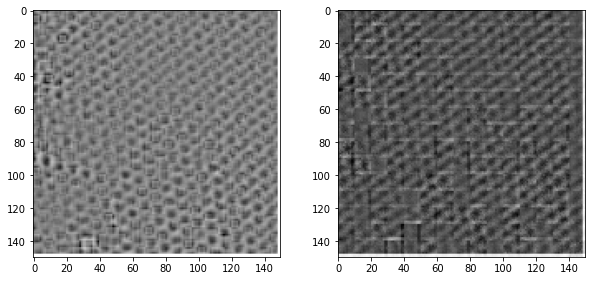

In [868]:
reconstructed = np.zeros((150,150))

count = 0
predictions = stacked_ae.predict(broken_up)
for i in range(number_steps):
    for j in range(number_steps):
        reconstructed[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  predictions[count,:,:]
        count +=1
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(reconstructed, cmap="binary")

plt.show()

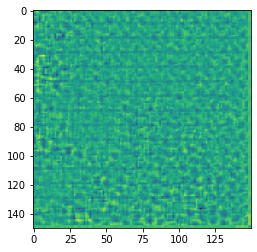

In [869]:
defect = (reconstructed - orig_scaled) 
plt.imshow(defect)

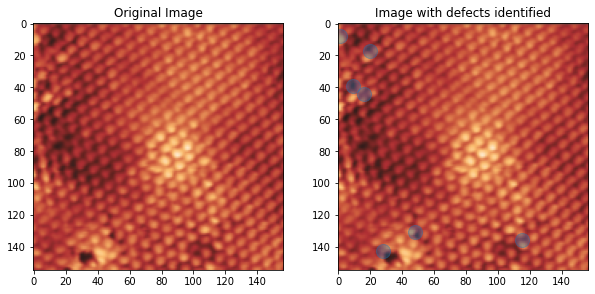

In [872]:
thresh = 0.3
plotdefect = []


for i in range(150):
    for j in range(150):
        if abs(defect[i,j]) > thresh:
            
            plotdefect.append([i,j])

            
            
plotdefect = np.asarray(plotdefect)



fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.title('Image with defects identified')

plt.imshow(img)
plt.scatter(plotdefect[:,1], plotdefect[:,0], s=200, alpha=0.35)
plt.savefig('./result_image3.png')
plt.show()



In [873]:
# Adjust contrast of the image
size_image = 6
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
orig_scaled = np.zeros((img_reshape.shape[0], img_reshape.shape[1]))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]
        avg_bright = np.sum(broken_up[count]) / (size_image*size_image)
        broken_up[count,:,:] = 0.5 + (broken_up[count,:,:] - avg_bright)
        orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  broken_up[count,:,:]
        count += 1

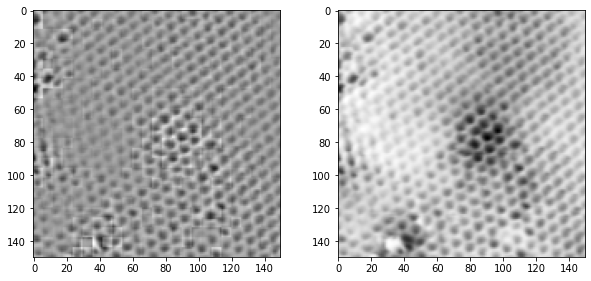

In [874]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(img_reshape, cmap="binary")

plt.show()

In [906]:
size_image = 6
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]

        count += 1

In [931]:
stacked_encoder = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[size_image,size_image]), # take input and flatten until a single vector
    keras.layers.Dense(25, activation="selu"),
    keras.layers.Dense(10, activation="selu"),
    #keras.layers.Dense(2, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(25,activation="selu", input_shape=[10]), # dense layer to decode
   #keras.layers.Dense(50, activation="relu"),
    #keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    keras.layers.Dense(size_image*size_image, activation="sigmoid"),
    keras.layers.Reshape([size_image,size_image])
])


stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(broken_up, broken_up, epochs=250)

Epoch 1/250
20/20 [==============================] - 0s 609us/step - loss: 0.0079
Epoch 2/250
20/20 [==============================] - 0s 560us/step - loss: 0.0050
Epoch 3/250
20/20 [==============================] - 0s 495us/step - loss: 0.0048
Epoch 4/250
20/20 [==============================] - 0s 472us/step - loss: 0.0046
Epoch 5/250
20/20 [==============================] - 0s 479us/step - loss: 0.0045
Epoch 6/250
20/20 [==============================] - 0s 488us/step - loss: 0.0044
Epoch 7/250
20/20 [==============================] - 0s 440us/step - loss: 0.0044
Epoch 8/250
20/20 [==============================] - 0s 470us/step - loss: 0.0043
Epoch 9/250
20/20 [==============================] - 0s 523us/step - loss: 0.0042
Epoch 10/250
20/20 [==============================] - 0s 483us/step - loss: 0.0042
Epoch 11/250
20/20 [==============================] - 0s 526us/step - loss: 0.0041
Epoch 12/250
20/20 [==============================] - 0s 545us/step - loss: 0.0040
Epoch 13/250


20/20 [==============================] - 0s 476us/step - loss: 7.4365e-04
Epoch 99/250
20/20 [==============================] - 0s 464us/step - loss: 7.3730e-04
Epoch 100/250
20/20 [==============================] - 0s 486us/step - loss: 7.2891e-04
Epoch 101/250
20/20 [==============================] - 0s 488us/step - loss: 7.3008e-04
Epoch 102/250
20/20 [==============================] - 0s 439us/step - loss: 7.1914e-04
Epoch 103/250
20/20 [==============================] - 0s 510us/step - loss: 7.1712e-04
Epoch 104/250
20/20 [==============================] - 0s 495us/step - loss: 7.1036e-04
Epoch 105/250
20/20 [==============================] - 0s 520us/step - loss: 7.0813e-04
Epoch 106/250
20/20 [==============================] - 0s 455us/step - loss: 7.0771e-04
Epoch 107/250
20/20 [==============================] - 0s 495us/step - loss: 6.9748e-04
Epoch 108/250
20/20 [==============================] - 0s 485us/step - loss: 6.9714e-04
Epoch 109/250
20/20 [==========================

20/20 [==============================] - 0s 450us/step - loss: 4.2839e-04
Epoch 192/250
20/20 [==============================] - 0s 435us/step - loss: 4.2174e-04
Epoch 193/250
20/20 [==============================] - 0s 452us/step - loss: 4.1838e-04
Epoch 194/250
20/20 [==============================] - 0s 436us/step - loss: 4.1736e-04
Epoch 195/250
20/20 [==============================] - 0s 473us/step - loss: 4.2126e-04
Epoch 196/250
20/20 [==============================] - 0s 543us/step - loss: 4.1357e-04
Epoch 197/250
20/20 [==============================] - 0s 468us/step - loss: 4.1207e-04
Epoch 198/250
20/20 [==============================] - 0s 539us/step - loss: 4.1043e-04
Epoch 199/250
20/20 [==============================] - 0s 470us/step - loss: 4.0748e-04
Epoch 200/250
20/20 [==============================] - 0s 462us/step - loss: 4.0417e-04
Epoch 201/250
20/20 [==============================] - 0s 468us/step - loss: 4.0003e-04
Epoch 202/250
20/20 [=========================

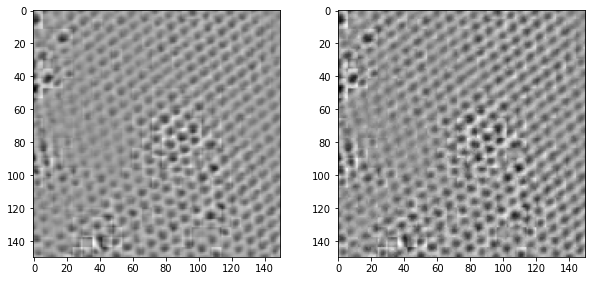

In [932]:
reconstructed = np.zeros((150,150))

count = 0
predictions = stacked_ae.predict(broken_up)
for i in range(number_steps):
    for j in range(number_steps):
        reconstructed[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  predictions[count,:,:]
        count +=1
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(reconstructed, cmap="binary")

plt.show()

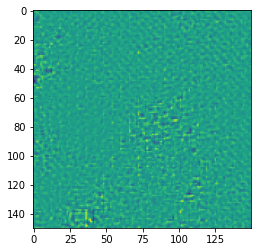

In [933]:
defect = (reconstructed - orig_scaled) 
plt.imshow(defect)

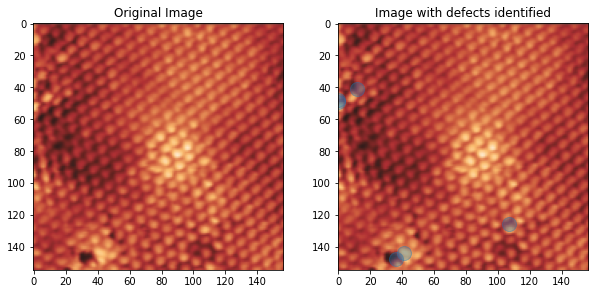

In [936]:
thresh = 0.11
plotdefect = []


for i in range(150):
    for j in range(150):
        if abs(defect[i,j]) > thresh:
            
            plotdefect.append([i,j])

            
            
plotdefect = np.asarray(plotdefect)



fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.title('Image with defects identified')

plt.imshow(img)
plt.scatter(plotdefect[:,1], plotdefect[:,0], s=200, alpha=0.35)
plt.savefig('./result_image3b.png')
plt.show()



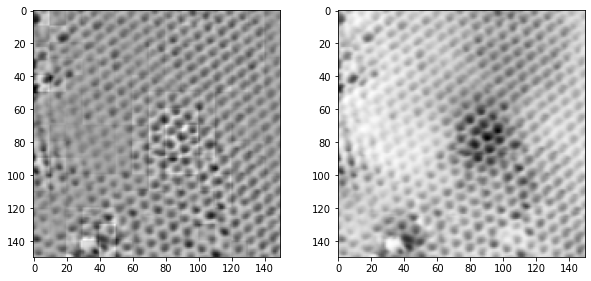

In [1087]:
# Adjust contrast of the image
size_image = 10
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
orig_scaled = np.zeros((img_reshape.shape[0], img_reshape.shape[1]))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  img_reshape[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]
        avg_bright = np.sum(broken_up[count]) / (size_image*size_image)
        broken_up[count,:,:] = 0.5 + (broken_up[count,:,:] - avg_bright)
        orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  broken_up[count,:,:]
        count += 1
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(img_reshape, cmap="binary")

plt.show()

In [1112]:
size_image = 15
number_steps = int(len(img_reshape)/ size_image)
broken_up = np.zeros((number_steps*number_steps, size_image, size_image))
count = 0
for i in range(number_steps):
    for j in range(number_steps):
        broken_up[count,:,:] =  orig_scaled[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image]

        count += 1

In [1133]:
stacked_encoder = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[size_image,size_image]), # take input and flatten until a single vector
    keras.layers.Dense(250, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
    #keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(250,activation="selu", input_shape=[30]), # dense layer to decode
    #keras.layers.Dense(150, activation="relu"),
    #keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    keras.layers.Dense(size_image*size_image, activation="sigmoid"),
    keras.layers.Reshape([size_image,size_image])
])


stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(broken_up, broken_up, epochs=250)

Epoch 1/250
4/4 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 2/250
4/4 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 3/250
4/4 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 4/250
4/4 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 5/250
4/4 [==============================] - 0s 964us/step - loss: 0.0055
Epoch 6/250
4/4 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 7/250
4/4 [==============================] - 0s 817us/step - loss: 0.0055
Epoch 8/250
4/4 [==============================] - 0s 822us/step - loss: 0.0055
Epoch 9/250
4/4 [==============================] - 0s 896us/step - loss: 0.0055
Epoch 10/250
4/4 [==============================] - 0s 828us/step - loss: 0.0055
Epoch 11/250
4/4 [==============================] - 0s 843us/step - loss: 0.0054
Epoch 12/250
4/4 [==============================] - 0s 883us/step - loss: 0.0053
Epoch 13/250
4/4 [=============================

4/4 [==============================] - 0s 847us/step - loss: 0.0042
Epoch 103/250
4/4 [==============================] - 0s 813us/step - loss: 0.0042
Epoch 104/250
4/4 [==============================] - 0s 853us/step - loss: 0.0042
Epoch 105/250
4/4 [==============================] - 0s 854us/step - loss: 0.0042
Epoch 106/250
4/4 [==============================] - 0s 766us/step - loss: 0.0042
Epoch 107/250
4/4 [==============================] - 0s 825us/step - loss: 0.0041
Epoch 108/250
4/4 [==============================] - 0s 757us/step - loss: 0.0041
Epoch 109/250
4/4 [==============================] - 0s 756us/step - loss: 0.0041
Epoch 110/250
4/4 [==============================] - 0s 750us/step - loss: 0.0041
Epoch 111/250
4/4 [==============================] - 0s 948us/step - loss: 0.0041
Epoch 112/250
4/4 [==============================] - 0s 728us/step - loss: 0.0041
Epoch 113/250
4/4 [==============================] - 0s 823us/step - loss: 0.0041
Epoch 114/250
4/4 [===========

4/4 [==============================] - 0s 856us/step - loss: 0.0030
Epoch 203/250
4/4 [==============================] - 0s 898us/step - loss: 0.0030
Epoch 204/250
4/4 [==============================] - 0s 809us/step - loss: 0.0030
Epoch 205/250
4/4 [==============================] - 0s 817us/step - loss: 0.0030
Epoch 206/250
4/4 [==============================] - 0s 847us/step - loss: 0.0029
Epoch 207/250
4/4 [==============================] - 0s 814us/step - loss: 0.0030
Epoch 208/250
4/4 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 209/250
4/4 [==============================] - 0s 813us/step - loss: 0.0030
Epoch 210/250
4/4 [==============================] - 0s 753us/step - loss: 0.0029
Epoch 211/250
4/4 [==============================] - 0s 925us/step - loss: 0.0029
Epoch 212/250
4/4 [==============================] - 0s 913us/step - loss: 0.0029
Epoch 213/250
4/4 [==============================] - 0s 839us/step - loss: 0.0029
Epoch 214/250
4/4 [=============

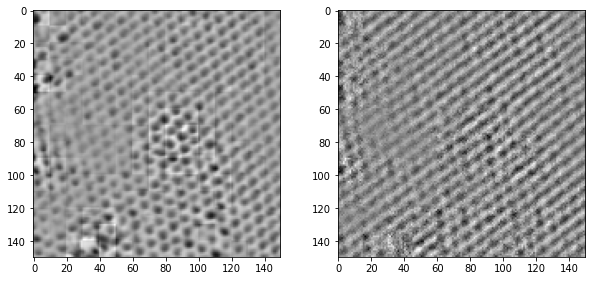

In [1134]:
reconstructed = np.zeros((150,150))

count = 0
predictions = stacked_ae.predict(broken_up)
for i in range(number_steps):
    for j in range(number_steps):
        reconstructed[i*size_image:i*size_image+size_image, j*size_image:j*size_image+size_image] =  predictions[count,:,:]
        count +=1
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(orig_scaled, cmap="binary")
plt.subplot(2, 2, 2)
plt.imshow(reconstructed, cmap="binary")

plt.show()

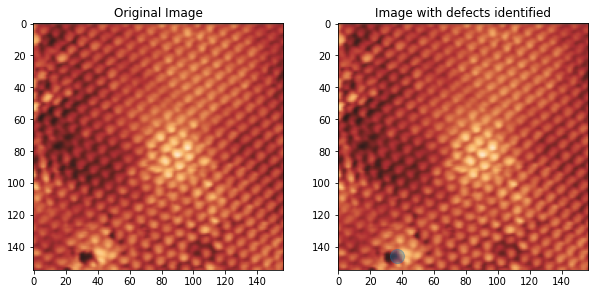

In [1138]:
defect = (reconstructed - orig_scaled) 
thresh = 0.28
plotdefect = []


for i in range(150):
    for j in range(150):
        if abs(defect[i,j]) > thresh:
            
            plotdefect.append([i,j])

            
            
plotdefect = np.asarray(plotdefect)



fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.title('Image with defects identified')

plt.imshow(img)
plt.scatter(plotdefect[:,1], plotdefect[:,0], s=200, alpha=0.35)
plt.savefig('./result_image3c.png')
plt.show()
